In [1]:
# Author: Bhogaraju Shanmukha Sri Krishna
# RollNo: 112201013
print("Hello World!")

Hello World!


In [2]:
import numpy as np
import scipy as sp
import pandas as pd

In [72]:
# Task1a Generating samples
# Dont run this again
X = np.random.rand(100) * 5
a = np.random.rand()
b = np.random.rand()
e = np.random.rand(100)
def f(x, i):
    return x ** 2 + a * x + b + e[i]

yList = [f(X[i], i) for i in range(len(X))]
Y = np.array(yList)
Y

one = np.ones(100, dtype = 'long')
X1 = np.column_stack((one, X))
X

array([4.17447155, 3.84930531, 4.88697335, 3.58042535, 2.45909303,
       0.70163223, 0.84690201, 3.00829956, 2.96697882, 3.27448417,
       0.63655753, 0.36931383, 4.99644939, 1.75447155, 2.20573619,
       1.01000776, 3.2205838 , 4.06419209, 2.35245781, 4.21528921,
       4.48389006, 2.32232481, 0.84868895, 0.03133715, 2.0550886 ,
       1.12474746, 0.34831573, 0.62338749, 0.42473202, 3.25038157,
       3.76789395, 1.79287734, 1.40363869, 4.59747347, 4.45737777,
       1.15345734, 1.38503434, 1.29019131, 0.68331665, 2.92547707,
       1.64926164, 2.9501034 , 3.75870707, 3.53394608, 3.93027907,
       2.41903685, 0.84866222, 2.10071418, 4.28151602, 0.70833868,
       4.27058245, 3.36725406, 3.80802241, 2.78260629, 1.97128814,
       0.04705458, 3.77804612, 0.78822065, 2.79387846, 2.83360256,
       0.90765066, 1.90922871, 4.60639646, 0.40967264, 1.18571623,
       0.55622505, 1.36176047, 0.98649692, 4.42246986, 1.85187846,
       3.53489126, 4.25259425, 0.92221351, 2.77821862, 0.00685

In [86]:
# Task1b Find linear regressor
beta = np.linalg.inv(X1.T @ X1) @ X1.T @ Y
beta
# The values listed will be the required c, m values

array([-2.45218891,  5.36005604])

In [85]:
# Task 1c Mean square error
import sklearn

In [84]:
from sklearn.metrics import mean_squared_error as mse
def yPredF(x, i):
    return beta[0] + beta[1] * x[i]
# My predicted values 
yPredList = [yPredF(X, i) for i in range(len(X))]
yPred = np.array(yPredList)

meanErr = mse(Y, yPred)
meanErr

3.026723530837032

In [147]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
X2 = X.reshape(-1, 1)
model1.fit(X2, Y)

model1.coef_, model1.intercept_

(array([5.36005604]), -2.452188913472922)

In [88]:
from matplotlib import pyplot as plt

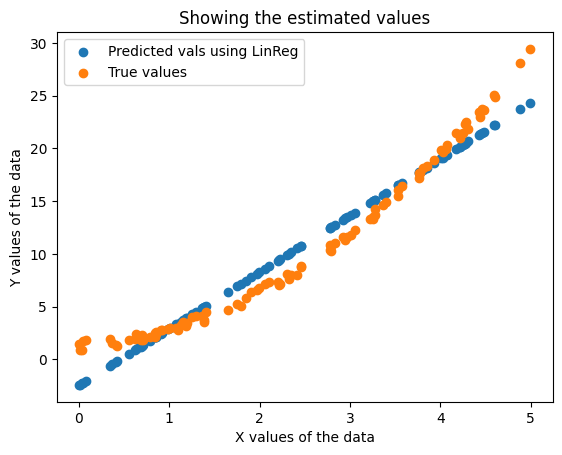

In [95]:
xValues = X
yValues = yPred

plt.xlabel("X values of the data")
plt.ylabel("Y values of the data")
plt.title("Showing the estimated values")
plt.scatter(X, yPred, label = "Predicted vals using LinReg")
plt.scatter(X, Y, label = "True values")
plt.legend()

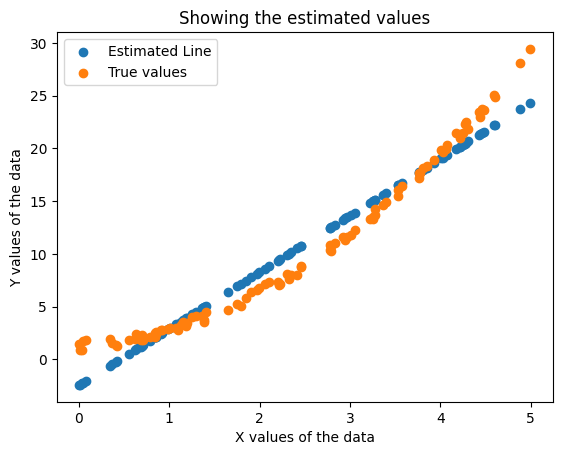

In [89]:


xValues = X
yValues = model1.predict(X2)
yTrue = Y


plt.xlabel("X values of the data")
plt.ylabel("Y values of the data")
plt.title("Showing the estimated values")

plt.scatter(xValues, yValues, label = "Estimated Line")

plt.scatter(xValues, Y, label = "True values")

plt.legend()
plt.show()

In [96]:
# MSE sklearn
mseLoss = mse(Y, yValues)
mseLoss

3.026723530837032

In [112]:
modelQuad = LinearRegression()

Xsq = np.array([x ** 2 for x in X])

Xdash = np.column_stack((Xsq, X, one))
M = np.linalg.inv(Xdash.T @ Xdash) @ Xdash.T @ Y

yPredQ = np.array([ M[0] * x**2 + M[1] * x + M[2] for x in X])
mseQLoss = mse(Y, yPredQ)
mseQLoss

0.07660264517941878

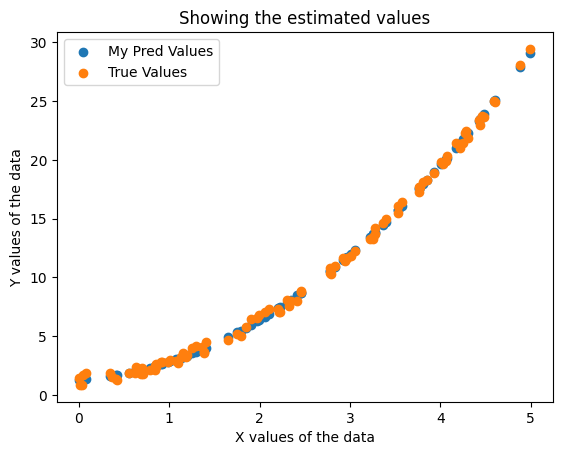

In [113]:
plt.xlabel("X values of the data")
plt.ylabel("Y values of the data")
plt.title("Showing the estimated values")

plt.scatter(X, yPredQ, label = "My Pred Values")
plt.scatter(X, Y, label = "True Values")
plt.legend()

# Analysis: Quadratic is better than linear as less mse and more closely fit

In [134]:
# Task 2a Reading data and describing it
df = pd.read_csv('week3/medical_expenditure.csv')
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0.0,yes,southwest,16884.92400
1,2,18,male,33.770,1.0,no,southeast,1725.55230
2,3,28,male,33.000,3.0,no,southeast,4449.46200
3,4,33,male,22.705,0.0,no,northwest,21984.47061
4,5,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3.0,no,northwest,10600.54830
1334,1335,18,female,31.920,0.0,no,northeast,2205.98080
1335,1336,18,female,36.850,0.0,no,southeast,1629.83350
1336,1337,21,female,25.800,0.0,no,southwest,2007.94500


In [115]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1336.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.095060,13270.422265
std,386.391641,14.049960,6.098187,1.205769,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [116]:
df.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    2
smoker      1
region      2
charges     0
dtype: int64

In [166]:
mean_values = df.mean(numeric_only = True)
modeSer = pd.Series(data = df['smoker'])  
modeSer2 = pd.Series(data = df['region'])
x = modeSer.mode()
y = modeSer2.mode()

values = {'children': mean_values, 'smoker': x[0], 'region': y[0]}

df = df.fillna(value = values)
x, y

(0    no
 Name: smoker, dtype: object,
 0    southeast
 Name: region, dtype: object)

In [167]:
df.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [177]:
categ = set()
for cat, val in df.items():
    if val.dtype == 'object':
        categ.add(cat)
categ

{'region', 'sex', 'smoker'}

In [192]:
from sklearn.preprocessing import LabelEncoder

newM = LabelEncoder()

catDict = {i: LabelEncoder() for i in categ}

# newM.fit(df['region'])
# newM.transform(df['region'])

for cat in catDict:
    catDict[cat].fit(df[cat])
    df[cat] = catDict[cat].transform(df[cat])
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0.0,1,3,16884.92400
1,2,18,1,33.770,1.0,0,2,1725.55230
2,3,28,1,33.000,3.0,0,2,4449.46200
3,4,33,1,22.705,0.0,0,1,21984.47061
4,5,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,1,30.970,3.0,0,1,10600.54830
1334,1335,18,0,31.920,0.0,0,0,2205.98080
1335,1336,18,0,36.850,0.0,0,2,1629.83350
1336,1337,21,0,25.800,0.0,0,3,2007.94500


In [201]:
xlist = np.array([])
ylist = np.array(df['charges'])

for cat in df:
    if cat != 'charges':
        if len(xlist) == 0:
            xlist = np.array(df[cat])
        else:
            xlist = np.column_stack((xlist, df[cat]))

xlist = np.array(xlist)
ylist = np.array(ylist)

xlist, ylist

(array([[1.000e+00, 1.900e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         3.000e+00],
        [2.000e+00, 1.800e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
         2.000e+00],
        [3.000e+00, 2.800e+01, 1.000e+00, ..., 3.000e+00, 0.000e+00,
         2.000e+00],
        ...,
        [1.336e+03, 1.800e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         2.000e+00],
        [1.337e+03, 2.100e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         3.000e+00],
        [1.338e+03, 6.100e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         1.000e+00]]),
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]))

In [203]:
# Task 2b Linear regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xlist, ylist, test_size=0.20, random_state=42)


In [212]:

newModel = LinearRegression()

newModel.fit(X_train, y_train)

store = newModel.predict(X_train)

findPrec = newModel.predict(X_test)
mse(y_train, store)

37247113.52644063

In [214]:
score = newModel.score(X_test, y_test)
score

0.7820000953099655

/tmp/ipykernel_7377/710742194.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


([0, 1, 2, 3, 4, 5, 6, 7],
 array([ 5.22780677e-01,  2.57554028e+02, -9.44210185e+00,  3.36340856e+02,
         4.13164691e+02,  2.36365402e+04, -2.69827735e+02]))

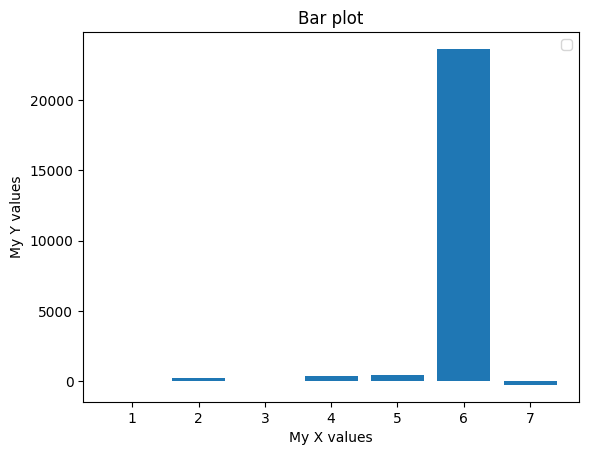

In [237]:


features = {}
count = 0
for i in df:
    features[i] = count
    count += 1

plt.title("Bar plot")
plt.xlabel("My X values")
plt.ylabel("My Y values")
plt.legend()

xvals = list(features.values())
yvals = newModel.coef_

plt.bar(xvals[1:], yvals)
xvals, yvals

In [224]:
# Task 2c Ridge regression
from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha = 1)
ridgeModel.fit(X_train, y_train)
storeRidge = ridgeModel.predict(X_train)
findRidge = ridgeModel.predict(X_test)

mse(y_train, storeRidge)

37250092.10407703

In [226]:
scoreR2r = ridgeModel.score(X_test, y_test)
scoreR2r

0.7817144102843274

/tmp/ipykernel_7377/4023483889.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


([0, 1, 2, 3, 4, 5, 6, 7],
 array([ 5.26316079e-01,  2.57353150e+02, -1.67722349e+00,  3.36358217e+02,
         4.13559995e+02,  2.35009188e+04, -2.69994238e+02]))

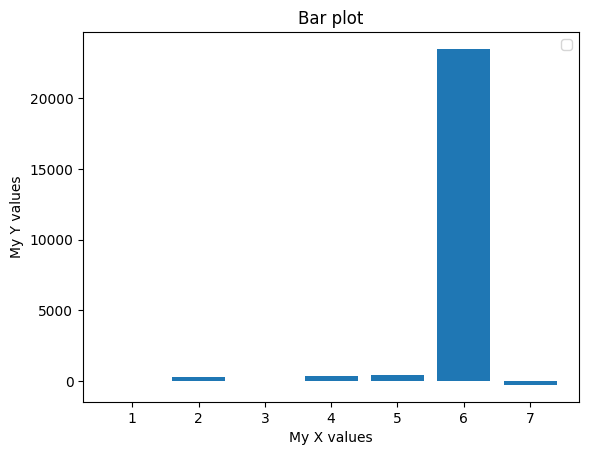

In [238]:
features = {}
count = 0
for i in df:
    features[i] = count
    count += 1

plt.title("Bar plot")
plt.xlabel("My X values")
plt.ylabel("My Y values")
plt.legend()

xvals = list(features.values())
yvals = ridgeModel.coef_

plt.bar(xvals[1:], yvals)
xvals, yvals